In [114]:
import pandas as pd
import numpy as np
import scikeras
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import tensorflow as tf
import matplotlib.pyplot as plt

#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#Feature Importance
from sklearn.ensemble import ExtraTreesClassifier


In [33]:
# Header = 0 to signify that the first row is the header
df = pd.read_csv("new_binary.csv", header = 0)

# Remove first unwanted column
df = df.iloc[: , 1:]
# Make sure each address is its own unique ID
df = df.assign(id=(df['address']).astype('category').cat.codes)
# Zero index year, normalize it for matrix calculations
df = df.assign(year=(df['year']).astype('category').cat.codes)
df = df.drop(['address'], axis=1)
#Separate X, Y
X = df.drop(['label'], axis = 1).astype(float)
Y = df.label.values

#normalizing
scaler = MinMaxScaler().fit(X)
x_scaled = scaler.transform(X)
n_features = x_scaled.shape[1]
print(n_features)

9


In [34]:
#BASELINE MODEL
model = Sequential()
# Add more layers, probably won't change from Sequential though
model.add(Dense(4, input_dim=n_features, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
# Add more metrics, try diff losses, optimizers, etc.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Precision', 'Recall', 'AUC'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 4)                 40        
                                                                 
 dense_10 (Dense)            (None, 2)                 10        
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 53
Trainable params: 53
Non-trainable params: 0
_________________________________________________________________


In [135]:
def plotmodel(model,plt):
    
    print(model.history.keys())
    
    ax = plt.gca()
    ax.set_ylim([0.70, 0.85])
          
    # summarize history for accuracy
    plt.plot(model.history['accuracy'])
    plt.plot(model.history['val_accuracy'])
    plt.title('model accuracy for baseline')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(model.history['loss'])
    plt.plot(model.history['val_loss'])
    plt.title('model loss  for baseline')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


    # summarize history for precision
    plt.plot(model.history['precision'])
    plt.plot(model.history['val_precision'])
    plt.title('model precision')
    plt.ylabel('precision')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
          
    # summarize history for recall
    plt.plot(model.history['recall'])
    plt.plot(model.history['val_recall'])
    plt.title('model recall  for baseline')
    plt.ylabel('recall')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # summarize history for recall
    plt.plot(model.history['auc'])
    plt.plot(model.history['val_auc'])
    plt.title('model auc  for baseline')
    plt.ylabel('auc')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    print("Model loss: %.2f%% (%.2f%%)" % (np.mean(model.history['loss'])*100, np.std(model.history['loss'])*100))
    print("Model accuracy: %.2f%% (%.2f%%)" % (np.mean(model.history['accuracy'])*100, np.std(model.history['accuracy'])*100))
    print("Model precision: %.2f%% (%.2f%%)" % (np.mean(model.history['precision'])*100, np.std(model.history['precision'])*100))
    print("Model recall: %.2f%% (%.2f%%)" % (np.mean(model.history['recall'])*100, np.std(model.history['recall'])*100))
    print("Model auc: %.2f%% (%.2f%%)" % (np.mean(model.history['auc'])*100, np.std(model.history['auc'])*100))
    print("Model val_loss: %.2f%% (%.2f%%)" % (np.mean(model.history['val_loss'])*100, np.std(model.history['val_loss'])*100))
    print("Model val_accuracy: %.2f%% (%.2f%%)" % (np.mean(model.history['val_accuracy'])*100, np.std(model.history['val_accuracy'])*100))
    print("Model val_precision: %.2f%% (%.2f%%)" % (np.mean(model.history['val_precision'])*100, np.std(model.history['val_precision'])*100))
    print("Model val_recall: %.2f%% (%.2f%%)" % (np.mean(model.history['val_recall'])*100, np.std(model.history['val_recall'])*100))
    print("Model val_auc: %.2f%% (%.2f%%)" % (np.mean(model.history['val_auc'])*100, np.std(model.history['val_auc'])*100))

Baseline Model Progress:
Epoch 1/100
875/875 - 1s - loss: 0.6911 - accuracy: 0.5623 - precision: 0.5437 - recall: 0.7793 - auc: 0.5499 - val_loss: 0.6879 - val_accuracy: 0.5792 - val_precision: 0.5667 - val_recall: 0.6725 - val_auc: 0.5873 - 1s/epoch - 2ms/step
Epoch 2/100
875/875 - 1s - loss: 0.6862 - accuracy: 0.5813 - precision: 0.5691 - recall: 0.6724 - auc: 0.5922 - val_loss: 0.6824 - val_accuracy: 0.5950 - val_precision: 0.5721 - val_recall: 0.7542 - val_auc: 0.6057 - 633ms/epoch - 724us/step
Epoch 3/100
875/875 - 1s - loss: 0.6816 - accuracy: 0.5907 - precision: 0.5769 - recall: 0.6827 - auc: 0.6012 - val_loss: 0.6774 - val_accuracy: 0.6001 - val_precision: 0.5820 - val_recall: 0.7107 - val_auc: 0.6163 - 628ms/epoch - 718us/step
Epoch 4/100
875/875 - 1s - loss: 0.6770 - accuracy: 0.5955 - precision: 0.5817 - recall: 0.6822 - auc: 0.6127 - val_loss: 0.6732 - val_accuracy: 0.5925 - val_precision: 0.5958 - val_recall: 0.5755 - val_auc: 0.6298 - 640ms/epoch - 732us/step
Epoch 5/100


Epoch 35/100
875/875 - 1s - loss: 0.5635 - accuracy: 0.7088 - precision: 0.6795 - recall: 0.7913 - auc: 0.7647 - val_loss: 0.5637 - val_accuracy: 0.7018 - val_precision: 0.6919 - val_recall: 0.7277 - val_auc: 0.7667 - 627ms/epoch - 717us/step
Epoch 36/100
875/875 - 1s - loss: 0.5630 - accuracy: 0.7090 - precision: 0.6799 - recall: 0.7906 - auc: 0.7654 - val_loss: 0.5617 - val_accuracy: 0.7081 - val_precision: 0.6880 - val_recall: 0.7615 - val_auc: 0.7668 - 638ms/epoch - 729us/step
Epoch 37/100
875/875 - 1s - loss: 0.5633 - accuracy: 0.7048 - precision: 0.6775 - recall: 0.7826 - auc: 0.7651 - val_loss: 0.5619 - val_accuracy: 0.7093 - val_precision: 0.6874 - val_recall: 0.7678 - val_auc: 0.7671 - 648ms/epoch - 741us/step
Epoch 38/100
875/875 - 1s - loss: 0.5632 - accuracy: 0.7078 - precision: 0.6791 - recall: 0.7891 - auc: 0.7649 - val_loss: 0.5611 - val_accuracy: 0.7149 - val_precision: 0.6787 - val_recall: 0.8162 - val_auc: 0.7670 - 681ms/epoch - 778us/step
Epoch 39/100
875/875 - 1s - 

Epoch 69/100
875/875 - 1s - loss: 0.5610 - accuracy: 0.7094 - precision: 0.6803 - recall: 0.7910 - auc: 0.7664 - val_loss: 0.5594 - val_accuracy: 0.7176 - val_precision: 0.6852 - val_recall: 0.8052 - val_auc: 0.7689 - 638ms/epoch - 729us/step
Epoch 70/100
875/875 - 1s - loss: 0.5610 - accuracy: 0.7093 - precision: 0.6807 - recall: 0.7892 - auc: 0.7669 - val_loss: 0.5605 - val_accuracy: 0.7239 - val_precision: 0.6747 - val_recall: 0.8648 - val_auc: 0.7688 - 637ms/epoch - 728us/step
Epoch 71/100
875/875 - 1s - loss: 0.5612 - accuracy: 0.7117 - precision: 0.6831 - recall: 0.7910 - auc: 0.7664 - val_loss: 0.5588 - val_accuracy: 0.7160 - val_precision: 0.6820 - val_recall: 0.8093 - val_auc: 0.7689 - 634ms/epoch - 725us/step
Epoch 72/100
875/875 - 1s - loss: 0.5603 - accuracy: 0.7125 - precision: 0.6832 - recall: 0.7935 - auc: 0.7676 - val_loss: 0.5596 - val_accuracy: 0.7207 - val_precision: 0.6767 - val_recall: 0.8450 - val_auc: 0.7694 - 644ms/epoch - 736us/step
Epoch 73/100
875/875 - 1s - 

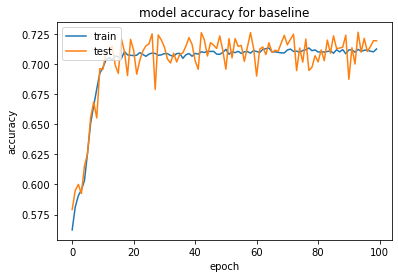

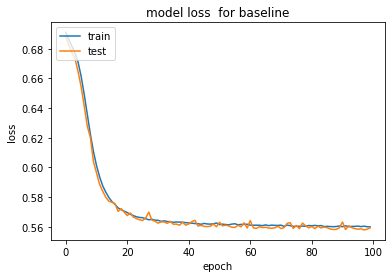

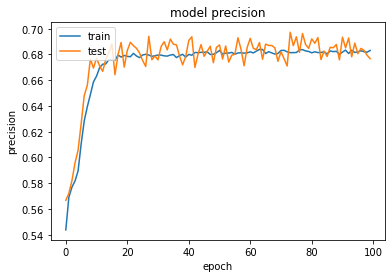

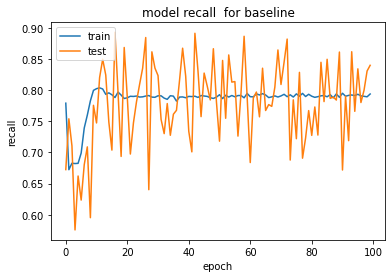

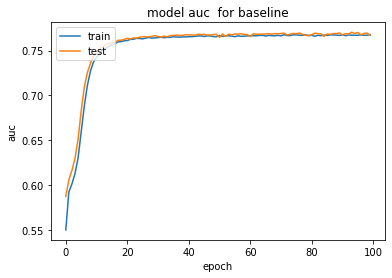

Model loss: 57.36% (3.03%)
Model accuracy: 70.09% (2.88%)
Model precision: 67.27% (2.56%)
Model recall: 78.48% (2.43%)
Model auc: 75.33% (3.93%)
Model val_loss: 57.22% (2.91%)
Model val_accuracy: 70.28% (2.90%)
Model val_precision: 67.65% (2.35%)
Model val_recall: 77.84% (6.67%)
Model val_auc: 75.66% (3.43%)


In [36]:
#Printing the statistics of baseline_model's evaluations
print('Baseline Model Progress:')
baseline_model = model.fit(x_scaled, Y, validation_split=0.3, epochs=100, batch_size=32, verbose=2)
print('Baseline Model Evaluations:')
plotmodel(baseline_model,plt)

In [165]:
#Feature Selection
# Select K Best
bestfeatures = SelectKBest(score_func=chi2, k=6)
fit = bestfeatures.fit(x_scaled,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(6,'Score'))  #print 6 best features

    Specs       Score
5  looped  182.835799
8      id  133.433357
0    year  125.377675
4   count   33.612807
2  length   31.486821
1     day   16.229831


In [166]:
k_best_X = df[['looped','year','id','length','count','day']]

scaler = MinMaxScaler().fit(k_best_X)
k_best_x_scaled = scaler.transform(k_best_X)
n_features = k_best_x_scaled.shape[1]

#BASELINE MODEL W/ FEATURE SELECTION
model = Sequential()
# Add more layers, probably won't change from Sequential though
model.add(Dense(4, input_dim=n_features, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
# Add more metrics, try diff losses, optimizers, etc.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Precision', 'Recall', 'AUC'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 4)                 24        
                                                                 
 dense_17 (Dense)            (None, 2)                 10        
                                                                 
 dense_18 (Dense)            (None, 1)                 3         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


6 Best Feature selected Model Model Progress:
Epoch 1/100
1750/1750 - 5s - loss: 0.6854 - accuracy: 0.5682 - precision: 0.5640 - recall: 0.6011 - auc: 0.5752 - val_loss: 0.6719 - val_accuracy: 0.5720 - val_precision: 0.5792 - val_recall: 0.5276 - val_auc: 0.6086 - 5s/epoch - 3ms/step
Epoch 2/100
1750/1750 - 4s - loss: 0.6590 - accuracy: 0.5913 - precision: 0.5867 - recall: 0.6181 - auc: 0.6162 - val_loss: 0.6484 - val_accuracy: 0.6072 - val_precision: 0.5766 - val_recall: 0.8079 - val_auc: 0.6148 - 4s/epoch - 2ms/step
Epoch 3/100
1750/1750 - 3s - loss: 0.6396 - accuracy: 0.6096 - precision: 0.5778 - recall: 0.8149 - auc: 0.6184 - val_loss: 0.6344 - val_accuracy: 0.6073 - val_precision: 0.5714 - val_recall: 0.8600 - val_auc: 0.6150 - 3s/epoch - 2ms/step
Epoch 4/100
1750/1750 - 3s - loss: 0.6291 - accuracy: 0.6189 - precision: 0.5749 - recall: 0.9129 - auc: 0.6285 - val_loss: 0.6277 - val_accuracy: 0.6156 - val_precision: 0.5716 - val_recall: 0.9240 - val_auc: 0.6459 - 3s/epoch - 2ms/ste

Epoch 35/100
1750/1750 - 4s - loss: 0.5720 - accuracy: 0.6719 - precision: 0.6168 - recall: 0.9078 - auc: 0.7222 - val_loss: 0.5700 - val_accuracy: 0.6711 - val_precision: 0.6163 - val_recall: 0.9078 - val_auc: 0.7251 - 4s/epoch - 2ms/step
Epoch 36/100
1750/1750 - 4s - loss: 0.5715 - accuracy: 0.6717 - precision: 0.6168 - recall: 0.9073 - auc: 0.7246 - val_loss: 0.5698 - val_accuracy: 0.6711 - val_precision: 0.6163 - val_recall: 0.9076 - val_auc: 0.7239 - 4s/epoch - 2ms/step
Epoch 37/100
1750/1750 - 4s - loss: 0.5710 - accuracy: 0.6718 - precision: 0.6167 - recall: 0.9084 - auc: 0.7252 - val_loss: 0.5692 - val_accuracy: 0.6712 - val_precision: 0.6164 - val_recall: 0.9075 - val_auc: 0.7267 - 4s/epoch - 3ms/step
Epoch 38/100
1750/1750 - 3s - loss: 0.5708 - accuracy: 0.6722 - precision: 0.6171 - recall: 0.9082 - auc: 0.7239 - val_loss: 0.5694 - val_accuracy: 0.6711 - val_precision: 0.6164 - val_recall: 0.9067 - val_auc: 0.7242 - 3s/epoch - 2ms/step
Epoch 39/100
1750/1750 - 3s - loss: 0.57

Epoch 70/100
1750/1750 - 3s - loss: 0.5688 - accuracy: 0.6722 - precision: 0.6165 - recall: 0.9115 - auc: 0.7258 - val_loss: 0.5672 - val_accuracy: 0.6715 - val_precision: 0.6155 - val_recall: 0.9147 - val_auc: 0.7266 - 3s/epoch - 2ms/step
Epoch 71/100
1750/1750 - 3s - loss: 0.5687 - accuracy: 0.6726 - precision: 0.6170 - recall: 0.9103 - auc: 0.7274 - val_loss: 0.5671 - val_accuracy: 0.6710 - val_precision: 0.6165 - val_recall: 0.9055 - val_auc: 0.7267 - 3s/epoch - 2ms/step
Epoch 72/100
1750/1750 - 3s - loss: 0.5688 - accuracy: 0.6721 - precision: 0.6166 - recall: 0.9110 - auc: 0.7261 - val_loss: 0.5668 - val_accuracy: 0.6718 - val_precision: 0.6166 - val_recall: 0.9089 - val_auc: 0.7265 - 3s/epoch - 2ms/step
Epoch 73/100
1750/1750 - 4s - loss: 0.5686 - accuracy: 0.6719 - precision: 0.6163 - recall: 0.9112 - auc: 0.7269 - val_loss: 0.5669 - val_accuracy: 0.6710 - val_precision: 0.6168 - val_recall: 0.9039 - val_auc: 0.7263 - 4s/epoch - 2ms/step
Epoch 74/100
1750/1750 - 4s - loss: 0.56

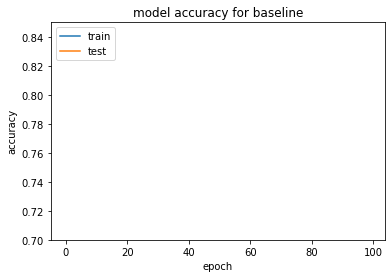

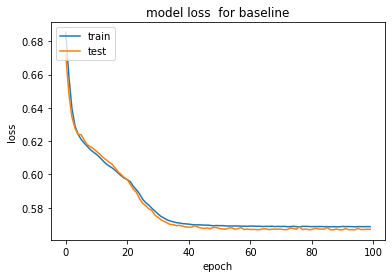

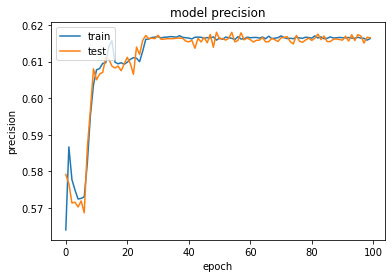

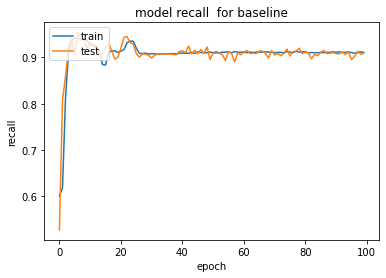

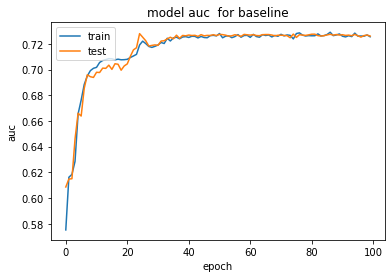

Model loss: 58.10% (2.17%)
Model accuracy: 66.57% (1.77%)
Model precision: 61.19% (1.14%)
Model recall: 90.63% (4.45%)
Model auc: 71.59% (2.47%)
Model val_loss: 57.96% (2.15%)
Model val_accuracy: 66.51% (1.71%)
Model val_precision: 61.15% (1.15%)
Model val_recall: 90.69% (4.14%)
Model val_auc: 71.61% (2.34%)


In [167]:
print('6 Best Feature selected Model Model Progress:')
featureSelected6_model = model.fit(k_best_x_scaled, Y, validation_split=0.3, epochs=100, batch_size=32, verbose=2)
print('Baseline Model Evaluations:')
plotmodel(featureSelected6_model,plt)

[0.29492059 0.15340875 0.04935534 0.07728282 0.04701023 0.02953446
 0.07280871 0.14531952 0.13035958]


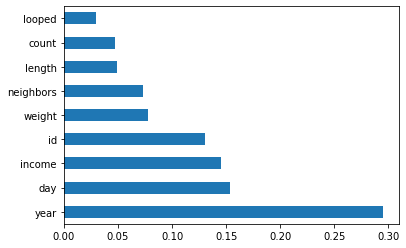

In [54]:
#Feature Importance

treesClass = ExtraTreesClassifier()
treesClass.fit(x_scaled, Y)
print(treesClass.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(treesClass.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [58]:
feature_imp_X = df[['year','day','income','id','weight','neighbors']]

scaler = MinMaxScaler().fit(feature_imp_X)
feature_imp_x_scaled = scaler.transform(feature_imp_X)
n_features = feature_imp_x_scaled.shape[1]

#BASELINE MODEL W/ FEATURE IMPORTANCE
model = Sequential()
# Add more layers, probably won't change from Sequential though
model.add(Dense(4, input_dim=n_features, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
# Add more metrics, try diff losses, optimizers, etc.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Precision', 'Recall', 'AUC'])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 4)                 28        
                                                                 
 dense_35 (Dense)            (None, 2)                 10        
                                                                 
 dense_36 (Dense)            (None, 1)                 3         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


6 Best Feature Importance  Model Progress:
Epoch 1/100
875/875 - 1s - loss: 0.6920 - accuracy: 0.5198 - precision: 0.5252 - recall: 0.4217 - auc: 0.5345 - val_loss: 0.6847 - val_accuracy: 0.5558 - val_precision: 0.5696 - val_recall: 0.4568 - val_auc: 0.5916 - 1s/epoch - 2ms/step
Epoch 2/100
875/875 - 1s - loss: 0.6782 - accuracy: 0.5888 - precision: 0.5846 - recall: 0.6160 - auc: 0.6148 - val_loss: 0.6704 - val_accuracy: 0.6033 - val_precision: 0.6030 - val_recall: 0.6052 - val_auc: 0.6356 - 654ms/epoch - 747us/step
Epoch 3/100
875/875 - 1s - loss: 0.6630 - accuracy: 0.6160 - precision: 0.6021 - recall: 0.6860 - auc: 0.6401 - val_loss: 0.6538 - val_accuracy: 0.6263 - val_precision: 0.5949 - val_recall: 0.7917 - val_auc: 0.6530 - 646ms/epoch - 739us/step
Epoch 4/100
875/875 - 1s - loss: 0.6424 - accuracy: 0.6204 - precision: 0.5996 - recall: 0.7270 - auc: 0.6533 - val_loss: 0.6258 - val_accuracy: 0.6375 - val_precision: 0.6030 - val_recall: 0.8050 - val_auc: 0.6685 - 658ms/epoch - 752us

Epoch 35/100
875/875 - 1s - loss: 0.5138 - accuracy: 0.7385 - precision: 0.6795 - recall: 0.9035 - auc: 0.7891 - val_loss: 0.5090 - val_accuracy: 0.7413 - val_precision: 0.6862 - val_recall: 0.8893 - val_auc: 0.7924 - 679ms/epoch - 776us/step
Epoch 36/100
875/875 - 1s - loss: 0.5131 - accuracy: 0.7377 - precision: 0.6790 - recall: 0.9024 - auc: 0.7890 - val_loss: 0.5084 - val_accuracy: 0.7427 - val_precision: 0.6868 - val_recall: 0.8923 - val_auc: 0.7931 - 694ms/epoch - 793us/step
Epoch 37/100
875/875 - 1s - loss: 0.5124 - accuracy: 0.7387 - precision: 0.6797 - recall: 0.9036 - auc: 0.7895 - val_loss: 0.5070 - val_accuracy: 0.7441 - val_precision: 0.6825 - val_recall: 0.9128 - val_auc: 0.7927 - 698ms/epoch - 798us/step
Epoch 38/100
875/875 - 1s - loss: 0.5115 - accuracy: 0.7385 - precision: 0.6795 - recall: 0.9037 - auc: 0.7894 - val_loss: 0.5062 - val_accuracy: 0.7432 - val_precision: 0.6854 - val_recall: 0.8990 - val_auc: 0.7939 - 673ms/epoch - 769us/step
Epoch 39/100
875/875 - 1s - 

Epoch 69/100
875/875 - 1s - loss: 0.4999 - accuracy: 0.7592 - precision: 0.7039 - recall: 0.8956 - auc: 0.7930 - val_loss: 0.4967 - val_accuracy: 0.7629 - val_precision: 0.7032 - val_recall: 0.9100 - val_auc: 0.7950 - 645ms/epoch - 737us/step
Epoch 70/100
875/875 - 1s - loss: 0.4994 - accuracy: 0.7608 - precision: 0.7049 - recall: 0.8980 - auc: 0.7929 - val_loss: 0.4984 - val_accuracy: 0.7600 - val_precision: 0.7004 - val_recall: 0.9087 - val_auc: 0.7945 - 651ms/epoch - 744us/step
Epoch 71/100
875/875 - 1s - loss: 0.4993 - accuracy: 0.7608 - precision: 0.7046 - recall: 0.8990 - auc: 0.7937 - val_loss: 0.4974 - val_accuracy: 0.7602 - val_precision: 0.7063 - val_recall: 0.8910 - val_auc: 0.7976 - 660ms/epoch - 755us/step
Epoch 72/100
875/875 - 1s - loss: 0.4990 - accuracy: 0.7603 - precision: 0.7046 - recall: 0.8971 - auc: 0.7950 - val_loss: 0.4955 - val_accuracy: 0.7635 - val_precision: 0.7075 - val_recall: 0.8983 - val_auc: 0.7951 - 650ms/epoch - 743us/step
Epoch 73/100
875/875 - 1s - 

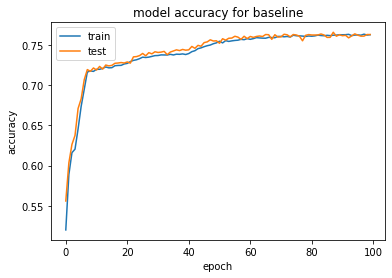

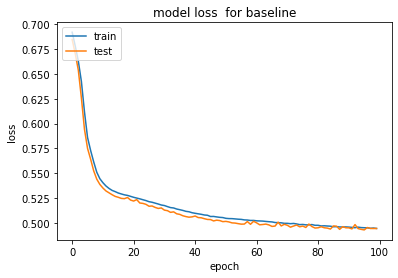

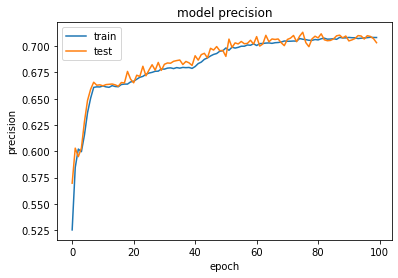

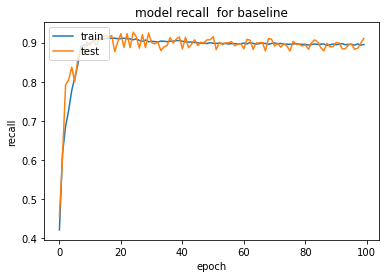

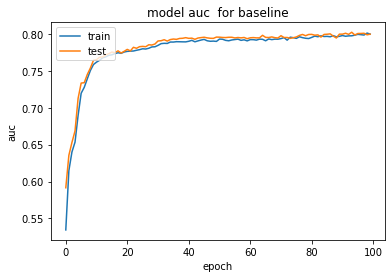

Model loss: 51.78% (3.68%)
Model accuracy: 73.92% (3.78%)
Model precision: 68.46% (2.95%)
Model recall: 88.58% (6.28%)
Model auc: 77.85% (3.93%)
Model val_loss: 51.42% (3.46%)
Model val_accuracy: 74.23% (3.35%)
Model val_precision: 68.78% (2.63%)
Model val_recall: 88.69% (5.62%)
Model val_auc: 78.27% (3.39%)


In [59]:
print('6 Best Feature Importance  Model Progress:')
featureImportance6_model = model.fit(feature_imp_x_scaled, Y, validation_split=0.3, epochs=100, batch_size=32, verbose=2)
print('6 Best Feature Importance  Model Evaluations:')
plotmodel(featureImportance6_model,plt)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 70)                490       
                                                                 
 dense_58 (Dense)            (None, 35)                2485      
                                                                 
 dense_59 (Dense)            (None, 4)                 144       
                                                                 
 dense_60 (Dense)            (None, 1)                 5         
                                                                 
Total params: 3,124
Trainable params: 3,124
Non-trainable params: 0
_________________________________________________________________
6 Best Feature Importance + High Neurons Model Progress:
Epoch 1/100
875/875 - 2s - loss: 0.6245 - accuracy: 0.6338 - precision: 0.6049 - recall: 0.7732 - auc: 0.6805 - val_loss: 0.56

Epoch 31/100
875/875 - 1s - loss: 0.4251 - accuracy: 0.8054 - precision: 0.7732 - recall: 0.8648 - auc: 0.8770 - val_loss: 0.4231 - val_accuracy: 0.8048 - val_precision: 0.7844 - val_recall: 0.8405 - val_auc: 0.8789 - 744ms/epoch - 850us/step
Epoch 32/100
875/875 - 1s - loss: 0.4233 - accuracy: 0.8063 - precision: 0.7730 - recall: 0.8679 - auc: 0.8774 - val_loss: 0.4311 - val_accuracy: 0.8016 - val_precision: 0.7900 - val_recall: 0.8215 - val_auc: 0.8756 - 712ms/epoch - 814us/step
Epoch 33/100
875/875 - 1s - loss: 0.4210 - accuracy: 0.8059 - precision: 0.7738 - recall: 0.8649 - auc: 0.8796 - val_loss: 0.4290 - val_accuracy: 0.8055 - val_precision: 0.7542 - val_recall: 0.9065 - val_auc: 0.8783 - 705ms/epoch - 806us/step
Epoch 34/100
875/875 - 1s - loss: 0.4228 - accuracy: 0.8061 - precision: 0.7723 - recall: 0.8688 - auc: 0.8786 - val_loss: 0.4340 - val_accuracy: 0.8010 - val_precision: 0.7787 - val_recall: 0.8410 - val_auc: 0.8708 - 701ms/epoch - 801us/step
Epoch 35/100
875/875 - 1s - 

Epoch 65/100
875/875 - 1s - loss: 0.3884 - accuracy: 0.8251 - precision: 0.7951 - recall: 0.8765 - auc: 0.8989 - val_loss: 0.3908 - val_accuracy: 0.8306 - val_precision: 0.7964 - val_recall: 0.8883 - val_auc: 0.8982 - 718ms/epoch - 821us/step
Epoch 66/100
875/875 - 1s - loss: 0.3906 - accuracy: 0.8235 - precision: 0.7920 - recall: 0.8778 - auc: 0.8975 - val_loss: 0.4073 - val_accuracy: 0.8101 - val_precision: 0.7924 - val_recall: 0.8403 - val_auc: 0.8903 - 731ms/epoch - 835us/step
Epoch 67/100
875/875 - 1s - loss: 0.3902 - accuracy: 0.8224 - precision: 0.7912 - recall: 0.8765 - auc: 0.8978 - val_loss: 0.4043 - val_accuracy: 0.8226 - val_precision: 0.8190 - val_recall: 0.8282 - val_auc: 0.8972 - 790ms/epoch - 903us/step
Epoch 68/100
875/875 - 1s - loss: 0.3882 - accuracy: 0.8246 - precision: 0.7938 - recall: 0.8775 - auc: 0.8994 - val_loss: 0.3872 - val_accuracy: 0.8311 - val_precision: 0.8083 - val_recall: 0.8680 - val_auc: 0.9007 - 731ms/epoch - 835us/step
Epoch 69/100
875/875 - 1s - 

Epoch 99/100
875/875 - 1s - loss: 0.3766 - accuracy: 0.8305 - precision: 0.7997 - recall: 0.8822 - auc: 0.9048 - val_loss: 0.3830 - val_accuracy: 0.8310 - val_precision: 0.8011 - val_recall: 0.8807 - val_auc: 0.9023 - 707ms/epoch - 808us/step
Epoch 100/100
875/875 - 1s - loss: 0.3778 - accuracy: 0.8317 - precision: 0.8006 - recall: 0.8839 - auc: 0.9041 - val_loss: 0.3801 - val_accuracy: 0.8322 - val_precision: 0.7908 - val_recall: 0.9033 - val_auc: 0.9041 - 715ms/epoch - 817us/step
6 Best Feature Importance  Model Evaluations:
dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc'])


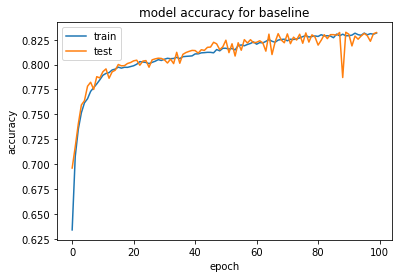

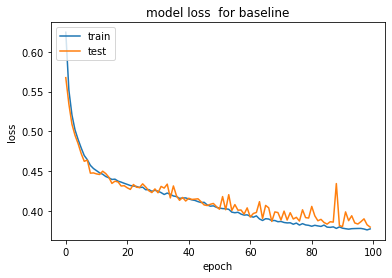

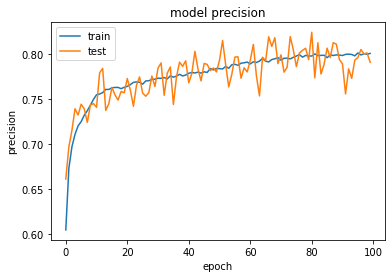

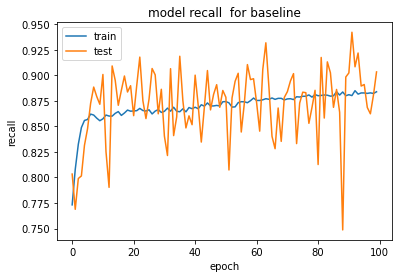

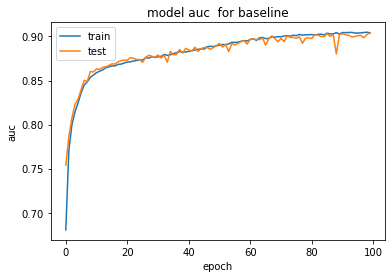

Model loss: 41.36% (3.92%)
Model accuracy: 80.92% (2.74%)
Model precision: 77.68% (2.89%)
Model recall: 86.97% (1.46%)
Model auc: 88.18% (3.07%)
Model val_loss: 41.71% (3.20%)
Model val_accuracy: 81.03% (2.27%)
Model val_precision: 77.72% (2.72%)
Model val_recall: 87.22% (3.44%)
Model val_auc: 88.20% (2.40%)


In [66]:
#FeatureImportance + High Increase in Neurons
model = Sequential()
# Add more layers, probably won't change from Sequential though
# Add more layers, probably won't change from Sequential though
model.add(Dense(70, input_dim=n_features, activation='relu'))

model.add(Dense(35, activation='relu'))

model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
# Add more metrics, try diff losses, optimizers, etc.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Precision', 'Recall', 'AUC'])

print('6 Best Feature Importance + High Neurons Model Progress:')
highNeurons_model = model.fit(feature_imp_x_scaled, Y, validation_split=0.3, epochs=100, batch_size=32, verbose=2)
print('6 Best Feature Importance  Model Evaluations:')
plotmodel(highNeurons_model,plt)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 70)                490       
                                                                 
 dropout (Dropout)           (None, 70)                0         
                                                                 
 dense_13 (Dense)            (None, 35)                2485      
                                                                 
 dropout_1 (Dropout)         (None, 35)                0         
                                                                 
 dense_14 (Dense)            (None, 4)                 144       
                                                                 
 dense_15 (Dense)            (None, 1)                 5         
                                                                 
Total params: 3,124
Trainable params: 3,124
Non-traina

Epoch 31/100
875/875 - 2s - loss: 0.4313 - accuracy: 0.8029 - precision: 0.7728 - recall: 0.8585 - auc: 0.8716 - val_loss: 0.4344 - val_accuracy: 0.8021 - val_precision: 0.7999 - val_recall: 0.8057 - val_auc: 0.8724 - 2s/epoch - 2ms/step
Epoch 32/100
875/875 - 2s - loss: 0.4311 - accuracy: 0.8034 - precision: 0.7734 - recall: 0.8586 - auc: 0.8715 - val_loss: 0.4226 - val_accuracy: 0.8130 - val_precision: 0.7689 - val_recall: 0.8950 - val_auc: 0.8776 - 2s/epoch - 2ms/step
Epoch 33/100
875/875 - 2s - loss: 0.4285 - accuracy: 0.8030 - precision: 0.7736 - recall: 0.8572 - auc: 0.8735 - val_loss: 0.4245 - val_accuracy: 0.8083 - val_precision: 0.7934 - val_recall: 0.8335 - val_auc: 0.8763 - 2s/epoch - 2ms/step
Epoch 34/100
875/875 - 2s - loss: 0.4273 - accuracy: 0.8052 - precision: 0.7759 - recall: 0.8587 - auc: 0.8745 - val_loss: 0.4172 - val_accuracy: 0.8159 - val_precision: 0.7892 - val_recall: 0.8622 - val_auc: 0.8801 - 2s/epoch - 2ms/step
Epoch 35/100
875/875 - 2s - loss: 0.4260 - accur

Epoch 66/100
875/875 - 2s - loss: 0.4099 - accuracy: 0.8151 - precision: 0.7854 - recall: 0.8677 - auc: 0.8855 - val_loss: 0.4057 - val_accuracy: 0.8210 - val_precision: 0.7914 - val_recall: 0.8718 - val_auc: 0.8877 - 2s/epoch - 2ms/step
Epoch 67/100
875/875 - 2s - loss: 0.4093 - accuracy: 0.8167 - precision: 0.7864 - recall: 0.8700 - auc: 0.8859 - val_loss: 0.4014 - val_accuracy: 0.8233 - val_precision: 0.7934 - val_recall: 0.8743 - val_auc: 0.8902 - 2s/epoch - 2ms/step
Epoch 68/100
875/875 - 2s - loss: 0.4079 - accuracy: 0.8155 - precision: 0.7851 - recall: 0.8693 - auc: 0.8866 - val_loss: 0.4025 - val_accuracy: 0.8210 - val_precision: 0.7827 - val_recall: 0.8888 - val_auc: 0.8907 - 2s/epoch - 2ms/step
Epoch 69/100
875/875 - 2s - loss: 0.4081 - accuracy: 0.8171 - precision: 0.7870 - recall: 0.8700 - auc: 0.8861 - val_loss: 0.4038 - val_accuracy: 0.8207 - val_precision: 0.7777 - val_recall: 0.8982 - val_auc: 0.8897 - 2s/epoch - 2ms/step
Epoch 70/100
875/875 - 2s - loss: 0.4086 - accur

6 Best Feature Importance  Model Evaluations:
dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc'])


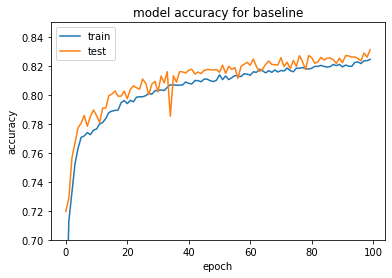

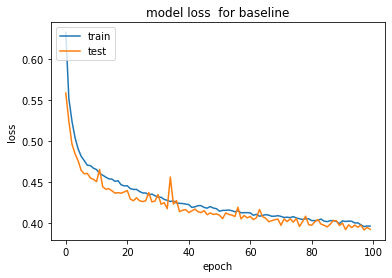

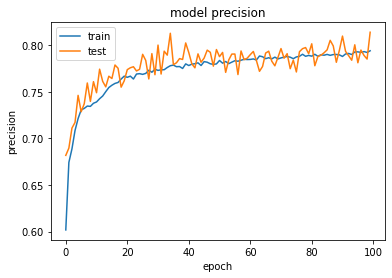

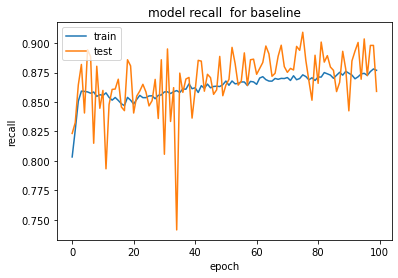

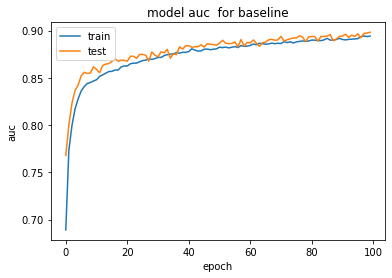

Model loss: 42.75% (3.47%)
Model accuracy: 80.34% (2.54%)
Model precision: 77.22% (2.77%)
Model recall: 86.30% (1.05%)
Model auc: 87.28% (2.73%)
Model val_loss: 42.04% (2.78%)
Model val_accuracy: 81.05% (1.92%)
Model val_precision: 77.87% (2.24%)
Model val_recall: 86.87% (2.51%)
Model val_auc: 87.89% (1.97%)


In [137]:
#adding dropout layers due to high overfitting

model = Sequential()
model.add(Dense(70, input_dim=n_features, activation='relu'))
model.add(Dropout(0.068))
model.add(Dense(35, activation='relu'))
model.add(Dropout(0.058))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
# Add more metrics, try diff losses, optimizers, etc.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Precision', 'Recall', 'AUC'])

print('6 Best Feature Importance + High Neurons Model Progress + dropout layers:')
dropoutLayers_model = model.fit(feature_imp_x_scaled, Y, validation_split=0.3, epochs=100, batch_size=32, verbose=2)
print('6 Best Feature Importance  Model Evaluations:')
plotmodel(dropoutLayers_model,plt)

In [149]:
#Tuning the hyper parameters to further fix the issue of overfitting while
#attempting to maintain accuracy


#Here we are tuning the network architecture and the learning rate for the optimizer
import keras_tuner as kt

def model_builder(hp):
    '''
    Args:
    hp - Keras tuner object
    '''
    # Initialize the Sequential API and start stacking the layers
    model1 = Sequential()
    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512
    hp_units = hp.Int('units', min_value=50, max_value=75, step=1)
    model1.add(Dense(input_dim=n_features,units=hp_units, activation='relu'))
    # Add next layers
    #model1.add(Dropout(0.068))
    

    hp_units2 = hp.Int('units2', min_value=20, max_value=40, step=1)
    model1.add(Dense(units=hp_units2, activation='relu'))
    #model1.add(Dropout(0.058))
    hp_units3 = hp.Int('units3', min_value=0, max_value=4, step=1)
    model1.add(Dense(units=hp_units3, activation='relu'))
    model1.add(Dense(1, activation='sigmoid'))


    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=Adam(learning_rate=hp_learning_rate),loss='binary_crossentropy',metrics=['accuracy', 'Precision', 'Recall', 'AUC'])
    return model

tuner = kt.Hyperband(model_builder, objective='val_accuracy',max_epochs=50,factor=10,overwrite=True)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
# Perform hypertuning

tuner.search(feature_imp_x_scaled, Y, validation_split=0.3, epochs=50,callbacks=[stop_early])


Trial 20 Complete [00h 00m 13s]
val_accuracy: 0.8362500071525574

Best val_accuracy So Far: 0.8362500071525574
Total elapsed time: 00h 03m 53s
INFO:tensorflow:Oracle triggered exit


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 70)                490       
                                                                 
 dropout (Dropout)           (None, 70)                0         
                                                                 
 dense_13 (Dense)            (None, 35)                2485      
                                                                 
 dropout_1 (Dropout)         (None, 35)                0         
                                                                 
 dense_14 (Dense)            (None, 4)                 144       
                                                                 
 dense_15 (Dense)            (None, 1)                 5         
                                                                 
Total params: 3,124
Trainable params: 3,124
Non-traina

Epoch 30/100
875/875 - 1s - loss: 0.3744 - accuracy: 0.8350 - precision: 0.8093 - recall: 0.8770 - auc: 0.9076 - val_loss: 0.3847 - val_accuracy: 0.8365 - val_precision: 0.8033 - val_recall: 0.8912 - val_auc: 0.9080 - 821ms/epoch - 938us/step
Epoch 31/100
875/875 - 1s - loss: 0.3722 - accuracy: 0.8357 - precision: 0.8082 - recall: 0.8808 - auc: 0.9083 - val_loss: 0.3846 - val_accuracy: 0.8367 - val_precision: 0.8027 - val_recall: 0.8928 - val_auc: 0.9081 - 816ms/epoch - 932us/step
Epoch 32/100
875/875 - 1s - loss: 0.3744 - accuracy: 0.8328 - precision: 0.8073 - recall: 0.8745 - auc: 0.9073 - val_loss: 0.3854 - val_accuracy: 0.8356 - val_precision: 0.8005 - val_recall: 0.8940 - val_auc: 0.9078 - 833ms/epoch - 952us/step
Epoch 33/100
875/875 - 1s - loss: 0.3735 - accuracy: 0.8355 - precision: 0.8092 - recall: 0.8784 - auc: 0.9074 - val_loss: 0.3850 - val_accuracy: 0.8351 - val_precision: 0.8018 - val_recall: 0.8902 - val_auc: 0.9078 - 768ms/epoch - 878us/step
Epoch 34/100
875/875 - 1s - 

Epoch 64/100
875/875 - 1s - loss: 0.3730 - accuracy: 0.8350 - precision: 0.8094 - recall: 0.8769 - auc: 0.9080 - val_loss: 0.3851 - val_accuracy: 0.8366 - val_precision: 0.8033 - val_recall: 0.8915 - val_auc: 0.9082 - 790ms/epoch - 903us/step
Epoch 65/100
875/875 - 1s - loss: 0.3740 - accuracy: 0.8339 - precision: 0.8069 - recall: 0.8781 - auc: 0.9077 - val_loss: 0.3856 - val_accuracy: 0.8355 - val_precision: 0.8021 - val_recall: 0.8908 - val_auc: 0.9079 - 758ms/epoch - 866us/step
Epoch 66/100
875/875 - 1s - loss: 0.3749 - accuracy: 0.8330 - precision: 0.8069 - recall: 0.8760 - auc: 0.9069 - val_loss: 0.3851 - val_accuracy: 0.8363 - val_precision: 0.8029 - val_recall: 0.8913 - val_auc: 0.9082 - 753ms/epoch - 861us/step
Epoch 67/100
875/875 - 1s - loss: 0.3719 - accuracy: 0.8351 - precision: 0.8085 - recall: 0.8785 - auc: 0.9087 - val_loss: 0.3853 - val_accuracy: 0.8357 - val_precision: 0.8016 - val_recall: 0.8922 - val_auc: 0.9081 - 870ms/epoch - 994us/step
Epoch 68/100
875/875 - 1s - 

Epoch 98/100
875/875 - 1s - loss: 0.3732 - accuracy: 0.8331 - precision: 0.8072 - recall: 0.8757 - auc: 0.9078 - val_loss: 0.3849 - val_accuracy: 0.8362 - val_precision: 0.8037 - val_recall: 0.8897 - val_auc: 0.9084 - 744ms/epoch - 850us/step
Epoch 99/100
875/875 - 1s - loss: 0.3740 - accuracy: 0.8342 - precision: 0.8080 - recall: 0.8770 - auc: 0.9075 - val_loss: 0.3857 - val_accuracy: 0.8364 - val_precision: 0.8021 - val_recall: 0.8932 - val_auc: 0.9083 - 855ms/epoch - 977us/step
Epoch 100/100
875/875 - 1s - loss: 0.3724 - accuracy: 0.8358 - precision: 0.8092 - recall: 0.8793 - auc: 0.9083 - val_loss: 0.3847 - val_accuracy: 0.8361 - val_precision: 0.8039 - val_recall: 0.8890 - val_auc: 0.9086 - 879ms/epoch - 1ms/step
dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc'])


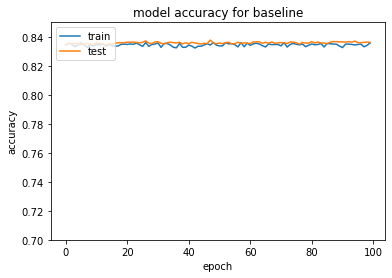

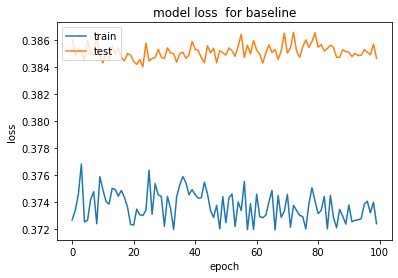

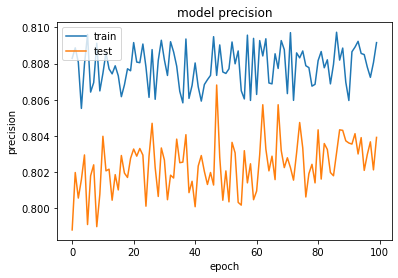

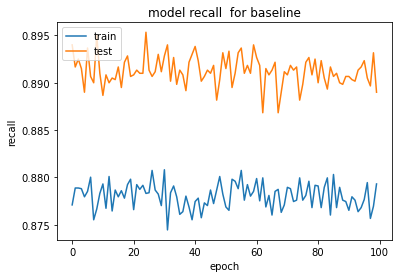

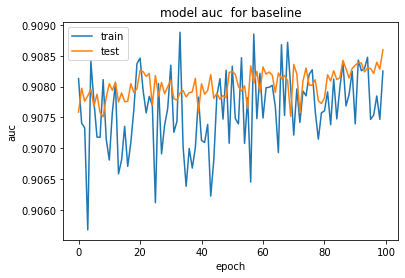

Model loss: 37.37% (0.11%)
Model accuracy: 83.45% (0.09%)
Model precision: 80.78% (0.11%)
Model recall: 87.81% (0.13%)
Model auc: 90.76% (0.06%)
Model val_loss: 38.51% (0.05%)
Model val_accuracy: 83.59% (0.06%)
Model val_precision: 80.24% (0.14%)
Model val_recall: 89.12% (0.15%)
Model val_auc: 90.80% (0.02%)


In [150]:
best_hp = tuner.get_best_hyperparameters()[0]
h_model = tuner.hypermodel.build(best_hp)
h_model.summary()

hyperTunedModel = h_model.fit(feature_imp_x_scaled, Y, validation_split=0.3, epochs=100, batch_size=32, verbose=2)

plotmodel(hyperTunedModel,plt)

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc'])


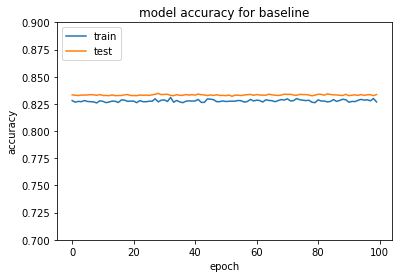

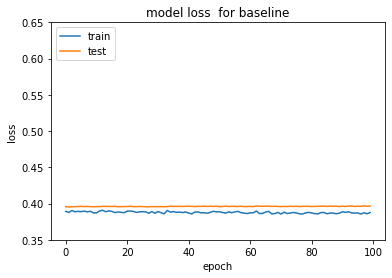

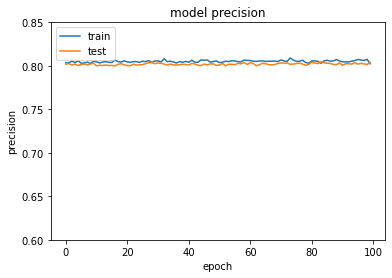

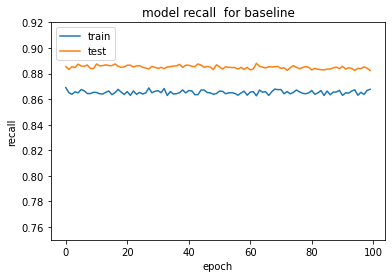

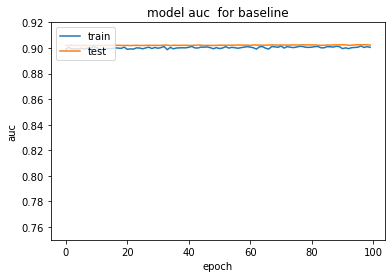

Model loss: 38.78% (0.12%)
Model accuracy: 82.78% (0.10%)
Model precision: 80.51% (0.12%)
Model recall: 86.53% (0.14%)
Model auc: 90.02% (0.07%)
Model val_loss: 39.61% (0.03%)
Model val_accuracy: 83.32% (0.04%)
Model val_precision: 80.19% (0.11%)
Model val_recall: 88.49% (0.12%)
Model val_auc: 90.21% (0.02%)


In [147]:



def plotmodel2(model,plt):
    
    print(model.history.keys())
    
    ax = plt.gca()
    ax.set_ylim([0.70, 0.9])
          
    # summarize history for accuracy
    plt.plot(model.history['accuracy'])
    plt.plot(model.history['val_accuracy'])
    plt.title('model accuracy for baseline')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    ax = plt.gca()
    ax.set_ylim([0.35, 0.65])
    # summarize history for loss
    plt.plot(model.history['loss'])
    plt.plot(model.history['val_loss'])
    plt.title('model loss  for baseline')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    ax = plt.gca()
    ax.set_ylim([0.6, 0.85])
    # summarize history for precision
    plt.plot(model.history['precision'])
    plt.plot(model.history['val_precision'])
    plt.title('model precision')
    plt.ylabel('precision')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
          
    ax = plt.gca()
    ax.set_ylim([0.75, 0.92])
    # summarize history for recall
    plt.plot(model.history['recall'])
    plt.plot(model.history['val_recall'])
    plt.title('model recall  for baseline')
    plt.ylabel('recall')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    ax = plt.gca()
    ax.set_ylim([0.75, 0.92])
    # summarize history for recall
    plt.plot(model.history['auc'])
    plt.plot(model.history['val_auc'])
    plt.title('model auc  for baseline')
    plt.ylabel('auc')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    print("Model loss: %.2f%% (%.2f%%)" % (np.mean(model.history['loss'])*100, np.std(model.history['loss'])*100))
    print("Model accuracy: %.2f%% (%.2f%%)" % (np.mean(model.history['accuracy'])*100, np.std(model.history['accuracy'])*100))
    print("Model precision: %.2f%% (%.2f%%)" % (np.mean(model.history['precision'])*100, np.std(model.history['precision'])*100))
    print("Model recall: %.2f%% (%.2f%%)" % (np.mean(model.history['recall'])*100, np.std(model.history['recall'])*100))
    print("Model auc: %.2f%% (%.2f%%)" % (np.mean(model.history['auc'])*100, np.std(model.history['auc'])*100))
    print("Model val_loss: %.2f%% (%.2f%%)" % (np.mean(model.history['val_loss'])*100, np.std(model.history['val_loss'])*100))
    print("Model val_accuracy: %.2f%% (%.2f%%)" % (np.mean(model.history['val_accuracy'])*100, np.std(model.history['val_accuracy'])*100))
    print("Model val_precision: %.2f%% (%.2f%%)" % (np.mean(model.history['val_precision'])*100, np.std(model.history['val_precision'])*100))
    print("Model val_recall: %.2f%% (%.2f%%)" % (np.mean(model.history['val_recall'])*100, np.std(model.history['val_recall'])*100))
    print("Model val_auc: %.2f%% (%.2f%%)" % (np.mean(model.history['val_auc'])*100, np.std(model.history['val_auc'])*100))
    
plotmodel2(hyperTunedModel,plt)

In [151]:
#Hypertuning the dropout rates with the number of neurons using the 6 most importance features
def model_builder2(hp):
    '''
    Args:
    hp - Keras tuner object
    '''
    # Initialize the Sequential API and start stacking the layers
    model1 = Sequential()
    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512
    hp_units = hp.Int('units', min_value=50, max_value=75, step=1)
    model1.add(Dense(input_dim=n_features,units=hp_units, activation='relu'))
    # Add next layers
    hp_dropRate_layer1 = hp.Float('dropRate_layer1', min_value=0, max_value=1, step=0.05)
    model1.add(Dropout(hp_dropRate_layer1))
    #model1.add(Dropout(0.068))
    

    hp_units2 = hp.Int('units2', min_value=20, max_value=40, step=1)
    model1.add(Dense(units=hp_units2, activation='relu'))
    hp_dropRate_layer2 = hp.Float('dropRate_layer2', min_value=0, max_value=1, step=0.05)
    model1.add(Dropout(hp_dropRate_layer2))
    #model1.add(Dropout(0.058))
    hp_units3 = hp.Int('units3', min_value=0, max_value=4, step=1)
    model1.add(Dense(units=hp_units3, activation='relu'))
    model1.add(Dense(1, activation='sigmoid'))


    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=Adam(learning_rate=hp_learning_rate),loss='binary_crossentropy',metrics=['accuracy', 'Precision', 'Recall', 'AUC'])
    return model

tuner = kt.Hyperband(model_builder2, objective='val_accuracy',max_epochs=50,factor=10,overwrite=True)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
# Perform hypertuning

tuner.search(feature_imp_x_scaled, Y, validation_split=0.3, epochs=50,callbacks=[stop_early])

Trial 20 Complete [00h 00m 12s]
val_accuracy: 0.8304166793823242

Best val_accuracy So Far: 0.8364166617393494
Total elapsed time: 00h 03m 29s
INFO:tensorflow:Oracle triggered exit


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 70)                490       
                                                                 
 dropout (Dropout)           (None, 70)                0         
                                                                 
 dense_13 (Dense)            (None, 35)                2485      
                                                                 
 dropout_1 (Dropout)         (None, 35)                0         
                                                                 
 dense_14 (Dense)            (None, 4)                 144       
                                                                 
 dense_15 (Dense)            (None, 1)                 5         
                                                                 
Total params: 3,124
Trainable params: 3,124
Non-traina

Epoch 30/100
875/875 - 1s - loss: 0.3799 - accuracy: 0.8300 - precision: 0.8063 - recall: 0.8691 - auc: 0.9040 - val_loss: 0.3882 - val_accuracy: 0.8350 - val_precision: 0.8026 - val_recall: 0.8885 - val_auc: 0.9072 - 810ms/epoch - 926us/step
Epoch 31/100
875/875 - 1s - loss: 0.3793 - accuracy: 0.8296 - precision: 0.8068 - recall: 0.8671 - auc: 0.9041 - val_loss: 0.3932 - val_accuracy: 0.8331 - val_precision: 0.7978 - val_recall: 0.8923 - val_auc: 0.9058 - 798ms/epoch - 912us/step
Epoch 32/100
875/875 - 1s - loss: 0.3782 - accuracy: 0.8309 - precision: 0.8075 - recall: 0.8695 - auc: 0.9047 - val_loss: 0.3921 - val_accuracy: 0.8377 - val_precision: 0.8020 - val_recall: 0.8967 - val_auc: 0.9054 - 826ms/epoch - 944us/step
Epoch 33/100
875/875 - 1s - loss: 0.3806 - accuracy: 0.8303 - precision: 0.8054 - recall: 0.8714 - auc: 0.9035 - val_loss: 0.3900 - val_accuracy: 0.8378 - val_precision: 0.8065 - val_recall: 0.8890 - val_auc: 0.9069 - 758ms/epoch - 866us/step
Epoch 34/100
875/875 - 1s - 

Epoch 64/100
875/875 - 1s - loss: 0.3781 - accuracy: 0.8300 - precision: 0.8041 - recall: 0.8729 - auc: 0.9050 - val_loss: 0.3951 - val_accuracy: 0.8381 - val_precision: 0.8032 - val_recall: 0.8957 - val_auc: 0.9069 - 796ms/epoch - 910us/step
Epoch 65/100
875/875 - 1s - loss: 0.3764 - accuracy: 0.8321 - precision: 0.8058 - recall: 0.8755 - auc: 0.9054 - val_loss: 0.3981 - val_accuracy: 0.8340 - val_precision: 0.7981 - val_recall: 0.8942 - val_auc: 0.9064 - 792ms/epoch - 905us/step
Epoch 66/100
875/875 - 1s - loss: 0.3766 - accuracy: 0.8310 - precision: 0.8075 - recall: 0.8695 - auc: 0.9061 - val_loss: 0.3963 - val_accuracy: 0.8353 - val_precision: 0.7986 - val_recall: 0.8968 - val_auc: 0.9070 - 751ms/epoch - 858us/step
Epoch 67/100
875/875 - 1s - loss: 0.3767 - accuracy: 0.8325 - precision: 0.8073 - recall: 0.8739 - auc: 0.9058 - val_loss: 0.3945 - val_accuracy: 0.8366 - val_precision: 0.7962 - val_recall: 0.9047 - val_auc: 0.9085 - 766ms/epoch - 875us/step
Epoch 68/100
875/875 - 1s - 

Epoch 98/100
875/875 - 1s - loss: 0.3765 - accuracy: 0.8320 - precision: 0.8051 - recall: 0.8765 - auc: 0.9059 - val_loss: 0.3981 - val_accuracy: 0.8382 - val_precision: 0.8054 - val_recall: 0.8920 - val_auc: 0.9055 - 745ms/epoch - 851us/step
Epoch 99/100
875/875 - 1s - loss: 0.3781 - accuracy: 0.8312 - precision: 0.8063 - recall: 0.8723 - auc: 0.9053 - val_loss: 0.3999 - val_accuracy: 0.8380 - val_precision: 0.8043 - val_recall: 0.8933 - val_auc: 0.9044 - 748ms/epoch - 855us/step
Epoch 100/100
875/875 - 1s - loss: 0.3776 - accuracy: 0.8325 - precision: 0.8077 - recall: 0.8733 - auc: 0.9052 - val_loss: 0.3950 - val_accuracy: 0.8384 - val_precision: 0.8018 - val_recall: 0.8990 - val_auc: 0.9089 - 748ms/epoch - 855us/step
dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc'])


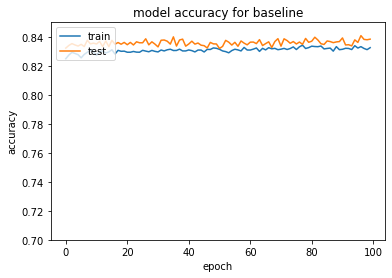

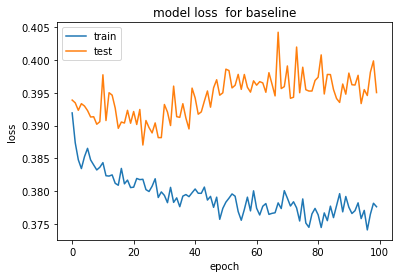

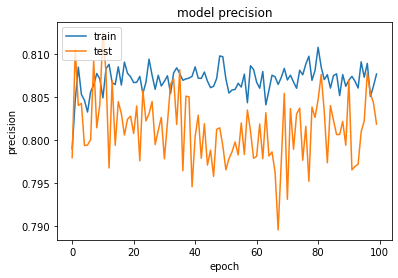

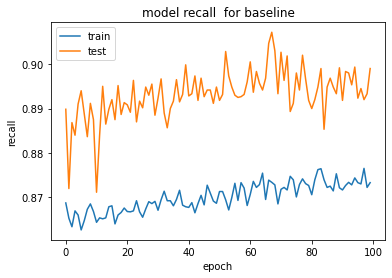

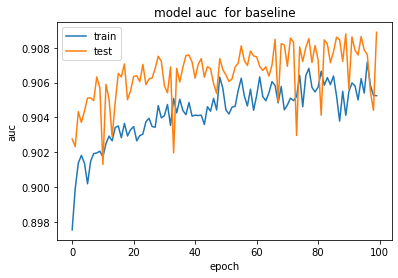

Model loss: 37.93% (0.30%)
Model accuracy: 83.08% (0.16%)
Model precision: 80.70% (0.15%)
Model recall: 87.01% (0.32%)
Model auc: 90.44% (0.16%)
Model val_loss: 39.44% (0.31%)
Model val_accuracy: 83.59% (0.18%)
Model val_precision: 80.13% (0.39%)
Model val_recall: 89.33% (0.55%)
Model val_auc: 90.65% (0.16%)


In [152]:
best_hp = tuner.get_best_hyperparameters()[0]
h_model2 = tuner.hypermodel.build(best_hp)
h_model2.summary()

hyperTunedModel2 = h_model2.fit(feature_imp_x_scaled, Y, validation_split=0.3, epochs=100, batch_size=32, verbose=2)

plotmodel(hyperTunedModel2,plt)

In [ ]:
#Not a lot of difference in peroformance but significant increase in stds but all still below 0

9
[0.29524836 0.15435574 0.04706612 0.07451475 0.04393169 0.02883439
 0.07141986 0.14641717 0.13821193]


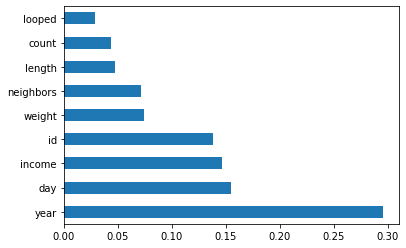

In [154]:

# Header = 0 to signify that the first row is the header
df = pd.read_csv("80kbinaryInstances.csv", header = 0)

# Remove first unwanted column
df = df.iloc[: , 1:]
# Make sure each address is its own unique ID
df = df.assign(id=(df['address']).astype('category').cat.codes)
# Zero index year, normalize it for matrix calculations
df = df.assign(year=(df['year']).astype('category').cat.codes)
df = df.drop(['address'], axis=1)
#Separate X, Y
X = df.drop(['label'], axis = 1).astype(float)
Y = df.label.values

#normalizing
scaler = MinMaxScaler().fit(X)
x_scaled = scaler.transform(X)
n_features = x_scaled.shape[1]
print(n_features)

#Feature Importance

treesClass = ExtraTreesClassifier()
treesClass.fit(x_scaled, Y)
print(treesClass.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(treesClass.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [155]:
feature_imp_X = df[['year','day','income','id','weight','neighbors']]

scaler = MinMaxScaler().fit(feature_imp_X)
feature_imp_x_scaled = scaler.transform(feature_imp_X)
n_features = feature_imp_x_scaled.shape[1]

In [161]:
def model_builder3(hp):
    '''
    Args:
    hp - Keras tuner object
    '''
    # Initialize the Sequential API and start stacking the layers
    model1 = Sequential()
    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512
    hp_units = hp.Int('units', min_value=50, max_value=75, step=1)
    model1.add(Dense(input_dim=n_features,units=hp_units, activation='relu'))
    # Add next layers
    hp_dropRate_layer1 = hp.Float('dropRate_layer1', min_value=0, max_value=1, step=0.05)
    model1.add(Dropout(hp_dropRate_layer1))
    #model1.add(Dropout(0.068))
    

    hp_units2 = hp.Int('units2', min_value=20, max_value=40, step=1)
    model1.add(Dense(units=hp_units2, activation='relu'))
    hp_dropRate_layer2 = hp.Float('dropRate_layer2', min_value=0, max_value=1, step=0.05)
    model1.add(Dropout(hp_dropRate_layer2))
    #model1.add(Dropout(0.058))
    hp_units3 = hp.Int('units3', min_value=0, max_value=4, step=1)
    model1.add(Dense(units=hp_units3, activation='relu'))
    model1.add(Dense(1, activation='sigmoid'))


    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=Adam(learning_rate=hp_learning_rate),loss='binary_crossentropy',metrics=['accuracy', 'Precision', 'Recall', 'AUC'])
    return model

tuner = kt.Hyperband(model_builder3, objective='val_accuracy',max_epochs=50,factor=10,overwrite=True)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
# Perform hypertuning

tuner.search(feature_imp_x_scaled, Y, validation_split=0.3, epochs=50,callbacks=[stop_early])

Trial 20 Complete [00h 00m 40s]
val_accuracy: 0.8456249833106995

Best val_accuracy So Far: 0.846708357334137
Total elapsed time: 00h 07m 41s
INFO:tensorflow:Oracle triggered exit


In [ ]:
best_hp = tuner.get_best_hyperparameters()[0]
h_model3 = tuner.hypermodel.build(best_hp)
h_model3.summary()

hyperTunedModel3 = h_model3.fit(feature_imp_x_scaled, Y, validation_split=0.3, epochs=100, batch_size=32, verbose=2)

plotmodel(hyperTunedModel3,plt)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 70)                490       
                                                                 
 dropout (Dropout)           (None, 70)                0         
                                                                 
 dense_13 (Dense)            (None, 35)                2485      
                                                                 
 dropout_1 (Dropout)         (None, 35)                0         
                                                                 
 dense_14 (Dense)            (None, 4)                 144       
                                                                 
 dense_15 (Dense)            (None, 1)                 5         
                                                                 
Total params: 3,124
Trainable params: 3,124
Non-traina

Epoch 31/100
1750/1750 - 4s - loss: 0.3584 - accuracy: 0.8448 - precision: 0.8232 - recall: 0.8782 - auc: 0.9143 - val_loss: 0.3789 - val_accuracy: 0.8332 - val_precision: 0.8277 - val_recall: 0.8418 - val_auc: 0.9034 - 4s/epoch - 2ms/step
Epoch 32/100
1750/1750 - 4s - loss: 0.3588 - accuracy: 0.8449 - precision: 0.8230 - recall: 0.8789 - auc: 0.9139 - val_loss: 0.3907 - val_accuracy: 0.8183 - val_precision: 0.8240 - val_recall: 0.8097 - val_auc: 0.8986 - 4s/epoch - 2ms/step
Epoch 33/100
1750/1750 - 5s - loss: 0.3601 - accuracy: 0.8457 - precision: 0.8241 - recall: 0.8792 - auc: 0.9146 - val_loss: 0.3905 - val_accuracy: 0.8188 - val_precision: 0.8246 - val_recall: 0.8100 - val_auc: 0.8988 - 5s/epoch - 3ms/step
Epoch 34/100
1750/1750 - 4s - loss: 0.3575 - accuracy: 0.8462 - precision: 0.8249 - recall: 0.8791 - auc: 0.9147 - val_loss: 0.3806 - val_accuracy: 0.8296 - val_precision: 0.8271 - val_recall: 0.8335 - val_auc: 0.9030 - 4s/epoch - 2ms/step
Epoch 35/100
1750/1750 - 4s - loss: 0.35